In [ ]:
pip install folium

In [ ]:
import pandas as pd # library for data analysis
import requests # library to handle requests
import numpy as np 
import folium
import json
from urllib.request import urlopen
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup # library to parse HTML documents
import plotly.express as px

Data Collection


In [ ]:
ownershipdta = pd.read_csv('https://raw.githubusercontent.com/ujwalgurung1/ujwalgurung1.github.io/main/project/data/UKHome.csv')

In [ ]:
ownershipdta

,Regioncode,Regionname,Localauthoritycode,Localauthorityname,OwnedOutright,OwnedwithMortgageorLoan,PrivateRent,SocialRent
0,E12000001,North East,E06000001,Hartlepool,30.72,28.33,18.19,22.76
1,E12000001,North East,E06000002,Middlesbrough,29.37,26.60,20.02,24.01
2,E12000001,North East,E06000003,Redcar and Cleveland,36.42,29.06,15.62,18.90
3,E12000001,North East,E06000004,Stockton-on-Tees,33.49,34.05,16.43,16.03
4,E12000001,North East,E06000005,Darlington,32.65,30.26,21.11,15.98
...,...,...,...,...,...,...,...,...
331,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
ownershipdta['Total Ownership Rate']=ownershipdta['OwnedOutright']+ownershipdta['OwnedwithMortgageorLoan']

In [ ]:
ownershipdta = ownershipdta.dropna()

In [ ]:
ownershipdta = ownershipdta.rename(columns={'Localauthorityname': 'LocalAuthority'})
ownershipdta

,Regioncode,Regionname,Localauthoritycode,LocalAuthority,OwnedOutright,OwnedwithMortgageorLoan,PrivateRent,SocialRent,Total Ownership Rate
0,E12000001,North East,E06000001,Hartlepool,30.72,28.33,18.19,22.76,59.05
1,E12000001,North East,E06000002,Middlesbrough,29.37,26.60,20.02,24.01,55.97
2,E12000001,North East,E06000003,Redcar and Cleveland,36.42,29.06,15.62,18.90,65.48
3,E12000001,North East,E06000004,Stockton-on-Tees,33.49,34.05,16.43,16.03,67.54
4,E12000001,North East,E06000005,Darlington,32.65,30.26,21.11,15.98,62.91
...,...,...,...,...,...,...,...,...,...
308,E12000009,South West,E07000083,Tewkesbury,41.23,31.10,15.49,12.18,72.33
309,E12000009,South West,E07000187,Mendip,40.38,28.52,18.82,12.28,68.90
310,E12000009,South West,E07000188,Sedgemoor,40.14,29.16,17.63,13.07,69.30
311,E12000009,South West,E07000189,South Somerset,40.75,27.73,16.60,14.92,68.48


In [ ]:
mobility = pd.read_csv('https://raw.githubusercontent.com/ujwalgurung1/ujwalgurung1.github.io/main/project/data/MobilityScores.csv')
mobility

,Code,LocalAuthority,Region,Overallscore,EarlyYears,Schools,Youth,Adulthood
0,E07000223,Adur,South East,-10.005418,-5.666597,2.434496,0.209065,-6.982383
1,E07000026,Allerdale,North West,-66.976652,-19.811003,-29.941335,-12.771984,-4.452329
2,E07000032,Amber Valley,East Midlands,-47.412538,5.233444,-37.530302,-22.206092,7.090412
3,E07000224,Arun,South East,-30.579008,-0.316019,-18.224905,4.054784,-16.092867
4,E07000170,Ashfield,East Midlands,-62.066681,-26.067006,-8.457679,-26.550217,-0.991779
...,...,...,...,...,...,...,...,...
319,E07000238,Wychavon,West Midlands,-54.765628,-30.020635,-8.261897,-17.617675,1.134578
320,E07000007,Wycombe,South East,28.228196,-13.021788,1.723201,27.217751,12.309031
321,E07000128,Wyre,North West,26.499618,16.663350,-2.939090,16.182863,-3.407505
322,E07000239,Wyre Forest,West Midlands,-33.547237,-3.226045,-20.737843,-4.308584,-5.274766


In [ ]:
merged = pd.merge(mobility, ownershipdta, on='LocalAuthority', how='left')
merged

,Code,LocalAuthority,Region,Overallscore,EarlyYears,Schools,Youth,Adulthood,Regioncode,Regionname,Localauthoritycode,OwnedOutright,OwnedwithMortgageorLoan,PrivateRent,SocialRent,Total Ownership Rate
0,E07000223,Adur,South East,-10.005418,-5.666597,2.434496,0.209065,-6.982383,E12000008,South East,E07000223,41.64,31.75,13.89,12.72,73.39
1,E07000026,Allerdale,North West,-66.976652,-19.811003,-29.941335,-12.771984,-4.452329,E12000002,North West,E07000026,42.27,26.18,12.98,18.57,68.45
2,E07000032,Amber Valley,East Midlands,-47.412538,5.233444,-37.530302,-22.206092,7.090412,E12000004,East Midlands,E07000032,41.71,31.31,14.51,12.47,73.02
3,E07000224,Arun,South East,-30.579008,-0.316019,-18.224905,4.054784,-16.092867,E12000008,South East,E07000224,45.78,27.71,17.32,9.19,73.49
4,E07000170,Ashfield,East Midlands,-62.066681,-26.067006,-8.457679,-26.550217,-0.991779,E12000004,East Midlands,E07000170,37.21,31.64,15.52,15.63,68.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,E07000238,Wychavon,West Midlands,-54.765628,-30.020635,-8.261897,-17.617675,1.134578,E12000005,West Midlands,E07000238,42.09,29.84,12.97,15.10,71.93
320,E07000007,Wycombe,South East,28.228196,-13.021788,1.723201,27.217751,12.309031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
321,E07000128,Wyre,North West,26.499618,16.663350,-2.939090,16.182863,-3.407505,E12000002,North West,E07000128,46.24,30.12,16.36,7.28,76.36
322,E07000239,Wyre Forest,West Midlands,-33.547237,-3.226045,-20.737843,-4.308584,-5.274766,E12000005,West Midlands,E07000239,41.43,29.41,14.93,14.23,70.84


Regression

In [ ]:
merged = merged.dropna()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



0.257700368234566


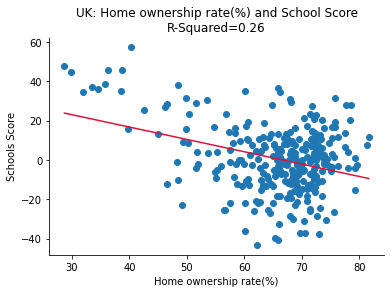

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
x = np.array([2, 3, 4])
poly = PolynomialFeatures(3, include_bias=False)
poly.fit_transform(x[:, None])

from sklearn.pipeline import make_pipeline

x = merged.dropna()['Total Ownership Rate']
y = merged.dropna()['Schools']

poly_model = make_pipeline(PolynomialFeatures(1),
                           LinearRegression())
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(min(x), max(x), 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])
ax = plt.gca()


ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('black')

plt.scatter(x, y)
plt.plot(xfit, yfit,color='crimson');
plt.title("UK: Home ownership rate(%) and School Score\nR-Squared=0.26")

plt.xlabel('Home ownership rate(%)')
plt.ylabel('Schools Score')

plt.savefig('UKOwnership&Schools.pdf')

poly_model = np.poly1d(np.polyfit(x, y, 3))

print(r2_score(y, poly_model(x)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



0.23299353666858058


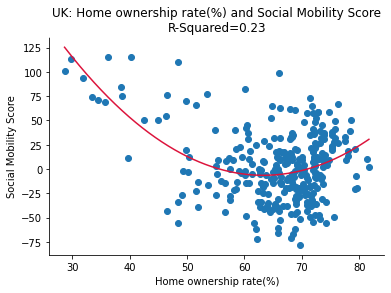

In [ ]:
x = merged.dropna()['Total Ownership Rate']
y = merged.dropna()['Overallscore']

poly_model = make_pipeline(PolynomialFeatures(2),
                           LinearRegression())
poly_model.fit(x[:, np.newaxis], y)
xfit = np.linspace(min(x), max(x), 1000)
yfit = poly_model.predict(xfit[:, np.newaxis])
ax = plt.gca()


ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('white') 
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('black')

plt.scatter(x, y)
plt.plot(xfit, yfit,color='crimson');
plt.title("UK: Home ownership rate(%) and Social Mobility Score\nR-Squared=0.23")

plt.xlabel('Home ownership rate(%)')
plt.ylabel('Social Mobility Score')

plt.savefig('UKOwnership&Mobility.pdf')

poly_model = np.poly1d(np.polyfit(x, y, 3))

print(r2_score(y, poly_model(x)))

Map

In [ ]:
with urlopen('https://raw.githubusercontent.com/martinjc/UK-GeoJSON/master/json/administrative/eng/topo_lad.json') as f:
  states_topo = json.load(f)

m = folium.Map(location=[52.3, 1.2],
                        zoom_start=6,
                        tiles="CartoDB dark_matter")
folium.TopoJson(states_topo,
             'objects.lad').add_to(m)


In [ ]:
states_topo['objects']['lad']['geometries'][0]['properties']['LAD13CD']

'E06000001'

In [ ]:
m = folium.Map(location=[51.509865, 1.18092],
                        zoom_start=6,
                        tiles="CartoDB dark_matter")



folium.Choropleth(geo_data=states_topo,
             data=merged, # my dataset
             columns=['Code','Overallscore'],
             name='England House Prices in 2013', 
             topojson='objects.lad',
             key_on='feature.properties.LAD13CD',
             legend_name="Social Moblity Score", 
             fill_color='Reds', fill_opacity=0.7, line_opacity=0.5).add_to(m)



m

In [ ]:
outfp = "choropleth_map.html"
m.save(outfp)